# Step 2: Enriching and cleaning
This jupyter notebook should only be opened after running the "1-downloading-and-cleaning.py" script. That script will download all the data necesary for this jupyter notebook and save it in the data folder. If it hasn't been run, remove the "#" from the first line of the bellow cell and run it, this will run the script. The setps within the cell will import all the libraries needed to run this jupyter notebook.

In [30]:
#! python 1-downloading-and-cleaning.py
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from python_scripts import cleaning as cl
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

## Loading our data
The previous script downloaded data from transit accidents in Barcelona from 01/01/2010 to 12/31/2021, cleaned it and stored it in a csv file in the folder called "data". It also downloaded weather information for the same period in Bacerlona from the Historical weather API from OpenMeteo:

https://open-meteo.com/

We will now proceed to load this data, enrich it into a single data source (taking the accidents data base and enricihing it with weather data).
First, we need to load the data:

In [31]:
accidents = pd.read_csv("data/accidents_clean.csv")
weather_hourly = pd.read_csv("data/hourly_weather.csv")
weather_daily = pd.read_csv("data/daily_weather.csv")

/var/folders/zt/x4f866fn6v5b11fyl7jzdnk80000gn/T/ipykernel_3972/2871015148.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("data/accidents_clean.csv")


In [32]:
accidents.sample(5)

,Unnamed: 0,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,date
2331,2331,2015S001296,7.0,Horta-Guinardó,43.0,Horta,316208.0,Santa Joana d'Arc,0019 0019,Laboral,Nit,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,2015-02-20 00:00:00
28774,28775,2014S002830,5.0,Sarrià-Sant Gervasi,51-5-26,Sant Gervasi - Galvany,28000.0,Augusta,0202 0226,Laboral,Tarda,Desconegut,0.0,1.0,0.0,1.0,2.0,2014-04-15 16:00:00
107290,107291,2019S006681,10.0,Sant Martí,67,la Vila Olímpica del Poblenou,701266.0,Marina ...,870000,Laboral,Matí,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,2019-08-28 10:00:00
110501,110502,2019S009898,1.0,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",163504.0,Antonio López / Isabel II ...,0002 0002,Laboral,Matí,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,2019-12-23 12:00:00
43955,43956,2011S006514,2.0,Eixample,21-2-10,Sant Antoni,114000.0,Espanya,0001 0001,Laboral,Matí,Desconegut,0.0,1.0,0.0,1.0,1.0,2011-09-29 09:00:00


In [33]:
weather_daily.sample(5)

,Unnamed: 0,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,precipitation_hours,date
4110,daily,21.1,10.7,15.7,9.2,20.3,14.5,2021-04-03T06:29,2021-04-03T19:19,0.0,0.0,0.0,2021-04-03
2744,daily,30.0,22.1,26.2,25.3,32.5,28.7,2017-07-07T05:23,2017-07-07T20:28,0.0,0.0,0.0,2017-07-07
1147,daily,13.5,5.7,9.7,3.2,12.1,8.1,2013-02-21T07:35,2013-02-21T18:33,0.3,0.3,2.0,2013-02-21
2216,daily,15.4,9.6,11.8,8.4,14.3,10.8,2016-01-26T08:07,2016-01-26T18:00,0.0,0.0,0.0,2016-01-26
2277,daily,16.3,10.3,13.4,9.0,14.5,11.9,2016-03-27T06:40,2016-03-27T19:12,0.0,0.0,0.0,2016-03-27


In [34]:
weather_hourly.sample(5)

,Unnamed: 0,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm,date
40905,hourly,24.6,85,21.9,0.1,0.1,7.2,72,21.9,0.141,2014-09-01 09:00:00
52354,hourly,9.8,84,7.2,0.0,0.0,9.8,278,15.1,0.181,2015-12-22 10:00:00
74294,hourly,25.8,53,15.6,0.0,0.0,15.6,154,17.2,0.167,2018-06-23 14:00:00
13219,hourly,26.3,80,22.6,0.0,0.0,20.1,223,18.4,0.152,2011-07-05 19:00:00
14220,hourly,29.4,51,18.3,0.0,0.0,13.3,167,21.1,0.151,2011-08-16 12:00:00


## Merging weather information with accident information
Since we have hour information for every entry in our accidents dataset, lets add the weather information for that specific hour. The weather information was requested for Barcelona (specifically at lattitude: 41.403438 and longitude: 2.174394) and we are assuming that weather conditions were fairly similar in the entire city for that whole hour.

### Pandas merge
We will ldo a left merge, where the left table is our accidents data. This is because we want to keep every data point in our accidents table and add weather information for that moment. The weather data has data point for every hour between 01/01/2010 and 31/12/2021. Since we are fairly certain that there was not an accident for every hour, we are not interested in keeping every line in the weather (right) table.

In [35]:
full_data = accidents
full_data = full_data.merge(weather_hourly, left_on="date", right_on="date", how="left")

In [36]:
full_data.sample(5)

,Unnamed: 0_x,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,...,Unnamed: 0_y,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm
20849,20850,2010S003622,4.0,Les Corts,42-4-20,la Maternitat i Sant Ramon,65200.0,Cardenal Reig,0030 0030,Laboral,...,hourly,22.5,74,17.6,0.0,0.0,20.5,202,13.8,0.157
16073,16074,2021S003412,2.0,Eixample,8,l'Antiga Esquerra de l'Eixample,23403.0,Aribau,0005 0005,NaN,...,hourly,23.0,77,18.7,0.0,0.0,15.4,217,17.7,0.174
25444,25445,2010S008664,5.0,Sarrià-Sant Gervasi,53-5-25,Sant Gervasi - la Bonanova,143904.0,General Mitre,0099 0099,Laboral,...,hourly,9.0,40,-3.8,0.0,0.0,10.3,282,14.4,0.153
12769,12770,2021S007257,9.0,Sant Andreu,61,la Sagrera,209900.0,Meridiana,0287 0291,NaN,...,hourly,12.9,79,9.3,0.0,0.0,6.2,353,15.9,0.167
40731,40732,2020S004338,2.0,Eixample,23-2-8,l'Antiga Esquerra de l'Eixample,18505.0,Aragó,0187 0187,Laboral,...,hourly,23.0,74,18.1,0.0,0.0,6.6,241,23.2,0.183


Excelent! Now we have weather information for every incident. Lets clean up a few columns and export our data:

In [37]:
cl.delete_columns(full_data,['Unnamed: 0_x', "Unnamed: 0_y"])
full_data.sample(5)

Deleted columns:  ['Unnamed: 0_x', 'Unnamed: 0_y']


,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,cyrcadian,...,date,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm
106624,2019S006015,7.0,Horta-Guinardó,36,la Font d'en Fargues,78303.0,Ciències / Llobregós ...,0043 0043,Laboral,Matí,...,2019-07-29 11:00:00,27.0,67,20.4,0.0,0.0,9.6,214,21.4,0.173
82799,2013S006526,5.0,Sarrià-Sant Gervasi,53-5-27,el Putxet i el Farró,143904.0,General Mitre,0198 0198,Laboral,Matí,...,2013-09-15 11:00:00,20.5,88,18.5,2.4,2.4,24.5,93,22.2,0.145
29851,2014S008713,3.0,Sants-Montjuïc,34-3-18,Sants,187207.0,Madrid,0140 0140,Laboral,Matí,...,2014-11-27 10:00:00,13.4,86,11.1,0.0,0.0,5.1,4,18.2,0.140
87073,2013S006244,10.0,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,346402.0,Trinxant,0027 0027,Laboral,Matí,...,2013-09-04 11:00:00,25.7,68,19.4,0.0,0.0,5.6,135,22.3,0.145
80082,2016S002665,10.0,Sant Martí,68,el Poblenou,311703.0,Sancho de Ávila,0173 0175,Laboral,Matí,...,2016-04-08 13:00:00,12.4,69,7.0,0.0,0.0,16.4,230,11.5,0.179


## Analyzing correlations in the merged dataset
Now that we have a cleaner data set, lets ananlyze correlations so that we know what to visualize in the next step:

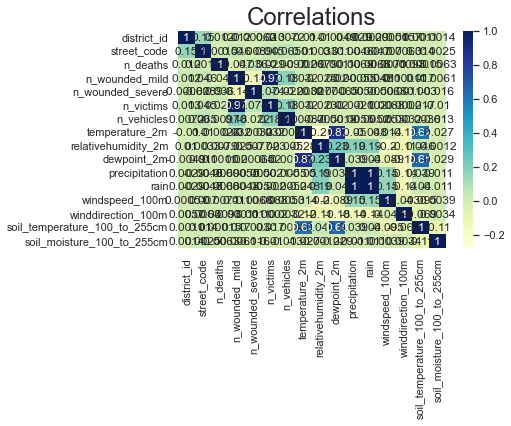

In [38]:
corr_matrix = full_data.corr()
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlations", size=24)
plt.savefig('images/correlation1.jpg', format='jpg', transparent=False, bbox_inches='tight')
plt.show()

Looks like we dont have much correlation between the weather data and the accident data.

## Grouping data to check if it affects correlation

Lets try grouping the accident data by the day and using our daily weather data to see if we have a stronger correlation (this would add the number of victims per day and might affect the correlation). Our daily weather data is less precise and will use mean values for temperature, humidity, etc. We are also adding data for min and max values for some weather variables.

Since we are centering our analysis in the amount of cases and the weather, we will simplify our data set further before grouping and finally merging.

In [39]:
accidents_grouped = accidents
cl.delete_columns(accidents_grouped, ['Unnamed: 0', 'district_id', 'neighborhood_id','neighborhood_name', 'street_code', 'street_name','postal_code', 'type_day'])
accidents_grouped.sample(5)

Deleted columns:  ['Unnamed: 0', 'district_id', 'neighborhood_id', 'neighborhood_name', 'street_code', 'street_name', 'postal_code', 'type_day']


,case_id,district_name,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,date
88977,2013S007075,Eixample,Nit,Desconegut,0.0,1.0,0.0,1.0,2.0,2013-10-06 03:00:00
8667,2015S008020,Nou Barris,Nit,No és causa del vianant,0.0,1.0,0.0,1.0,3.0,2015-10-25 00:00:00
3232,2015S009144,Les Corts,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,2015-12-02 09:00:00
63446,2012S003383,Gràcia,Tarda,Desconegut,0.0,2.0,0.0,2.0,1.0,2012-05-11 16:00:00
10322,2021S004726,Eixample,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,2021-08-27 10:00:00


In [40]:
accidents_grouped["date"] = pd.to_datetime(accidents_grouped['date'])
accidents_grouped = accidents_grouped.groupby([pd.Grouper(key="date", axis = 0, freq="D"), "district_name", "cyrcadian", "cause_incident"]).sum()
accidents_grouped.reset_index(inplace=True)
accidents_grouped.sample(5)

,date,district_name,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles
17752,2013-03-25,Les Corts,Tarda,Desconegut,0.0,1.0,1.0,2.0,4.0
4786,2010-11-16,Sant Andreu,Nit,Desconegut,0.0,0.0,0.0,0.0,1.0
41044,2017-04-30,Les Corts,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0
4455,2010-10-25,Sants-Montjuïc,Tarda,Desconegut,0.0,5.0,0.0,5.0,6.0
351,2010-01-24,Sarrià-Sant Gervasi,Matí,Desconegut,0.0,0.0,0.0,0.0,2.0


Now that we have our gropued data set, lets add the weather information.

## Merging grouped data with daily weather information

Daily weather data did not retain its DateTime type when importing the CSV. This will give an error when merging, so we will change it first.

In [41]:
weather_daily["date"] = pd.to_datetime(weather_daily["date"])

Now we will merge our newly created grouped accident data (by day) with our daily weather information:

In [42]:
grouped_data = accidents_grouped
grouped_data = grouped_data.merge(weather_daily, left_on="date", right_on="date", how="left")
grouped_data.sample(5)

,date,district_name,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,Unnamed: 0,...,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,precipitation_hours
39837,2017-02-17,Nou Barris,Nit,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,daily,...,9.0,11.7,7.4,14.8,10.6,2017-02-17T07:41,2017-02-17T18:28,0.0,0.0,0.0
33763,2016-01-29,Nou Barris,Tarda,No és causa del vianant,0.0,5.0,0.0,5.0,4.0,daily,...,9.9,11.9,8.5,14.3,11.0,2016-01-29T08:04,2016-01-29T18:04,0.0,0.0,0.0
41375,2017-05-20,Eixample,Matí,Desobeir el senyal del semàfor,0.0,1.0,0.0,1.0,1.0,daily,...,14.5,17.6,13.2,21.0,17.3,2017-05-20T05:26,2017-05-20T20:09,0.0,0.0,0.0
17778,2013-03-27,Gràcia,Tarda,Desconegut,0.0,1.0,0.0,1.0,2.0,daily,...,11.8,12.9,11.2,13.5,12.3,2013-03-27T06:40,2013-03-27T19:12,0.5,0.5,4.0
35155,2016-04-28,Sarrià-Sant Gervasi,Tarda,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,daily,...,11.6,12.9,9.7,13.3,11.4,2016-04-28T05:50,2016-04-28T19:47,12.6,12.6,18.0


Finally, lets clean this data set a little:

In [43]:
cl.delete_columns(grouped_data, ['Unnamed: 0'])

Deleted columns:  ['Unnamed: 0']


,date,district_name,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,precipitation_hours
0,2010-01-01,Eixample,Matí,Desconegut,0.0,2.0,0.0,2.0,2.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
1,2010-01-01,Eixample,Tarda,Desconegut,0.0,1.0,0.0,1.0,5.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
2,2010-01-01,Sant Andreu,Tarda,Desconegut,0.0,1.0,0.0,1.0,1.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
3,2010-01-01,Sant Martí,Tarda,Desconegut,0.0,3.0,0.0,3.0,4.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
4,2010-01-01,Sants-Montjuïc,Tarda,Desconegut,0.0,0.0,0.0,0.0,2.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,2021-12-31,Eixample,Tarda,No és causa del vianant,0.0,3.0,0.0,3.0,5.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0
65429,2021-12-31,Horta-Guinardó,Tarda,No és causa del vianant,0.0,2.0,0.0,2.0,3.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0
65430,2021-12-31,Sant Martí,Tarda,No és causa del vianant,0.0,2.0,0.0,2.0,4.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0
65431,2021-12-31,Sarrià-Sant Gervasi,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0


## Correlations in grouped data
Now that we have our grouped data set with weather information, let's see if the grouping affected correlation:

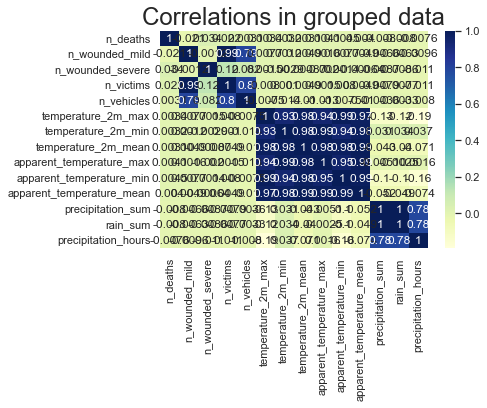

In [44]:
corr_matrix_grouped = grouped_data.corr()
dataplot_grouped = sns.heatmap(corr_matrix_grouped, cmap="YlGnBu", annot=True)
plt.title("Correlations in grouped data", size=24)
plt.savefig('images/correlation2.jpg', format='jpg', transparent=False, bbox_inches='tight')
plt.show()

Looks like they are still not correlated.
We might have an issue with the types of accidents being recorded. Our accidents data categorizes each accident by the column "cause_incident". 

## Analyzing correlations based on incident type:
Lets generate a correlation matrix for every type of accident:

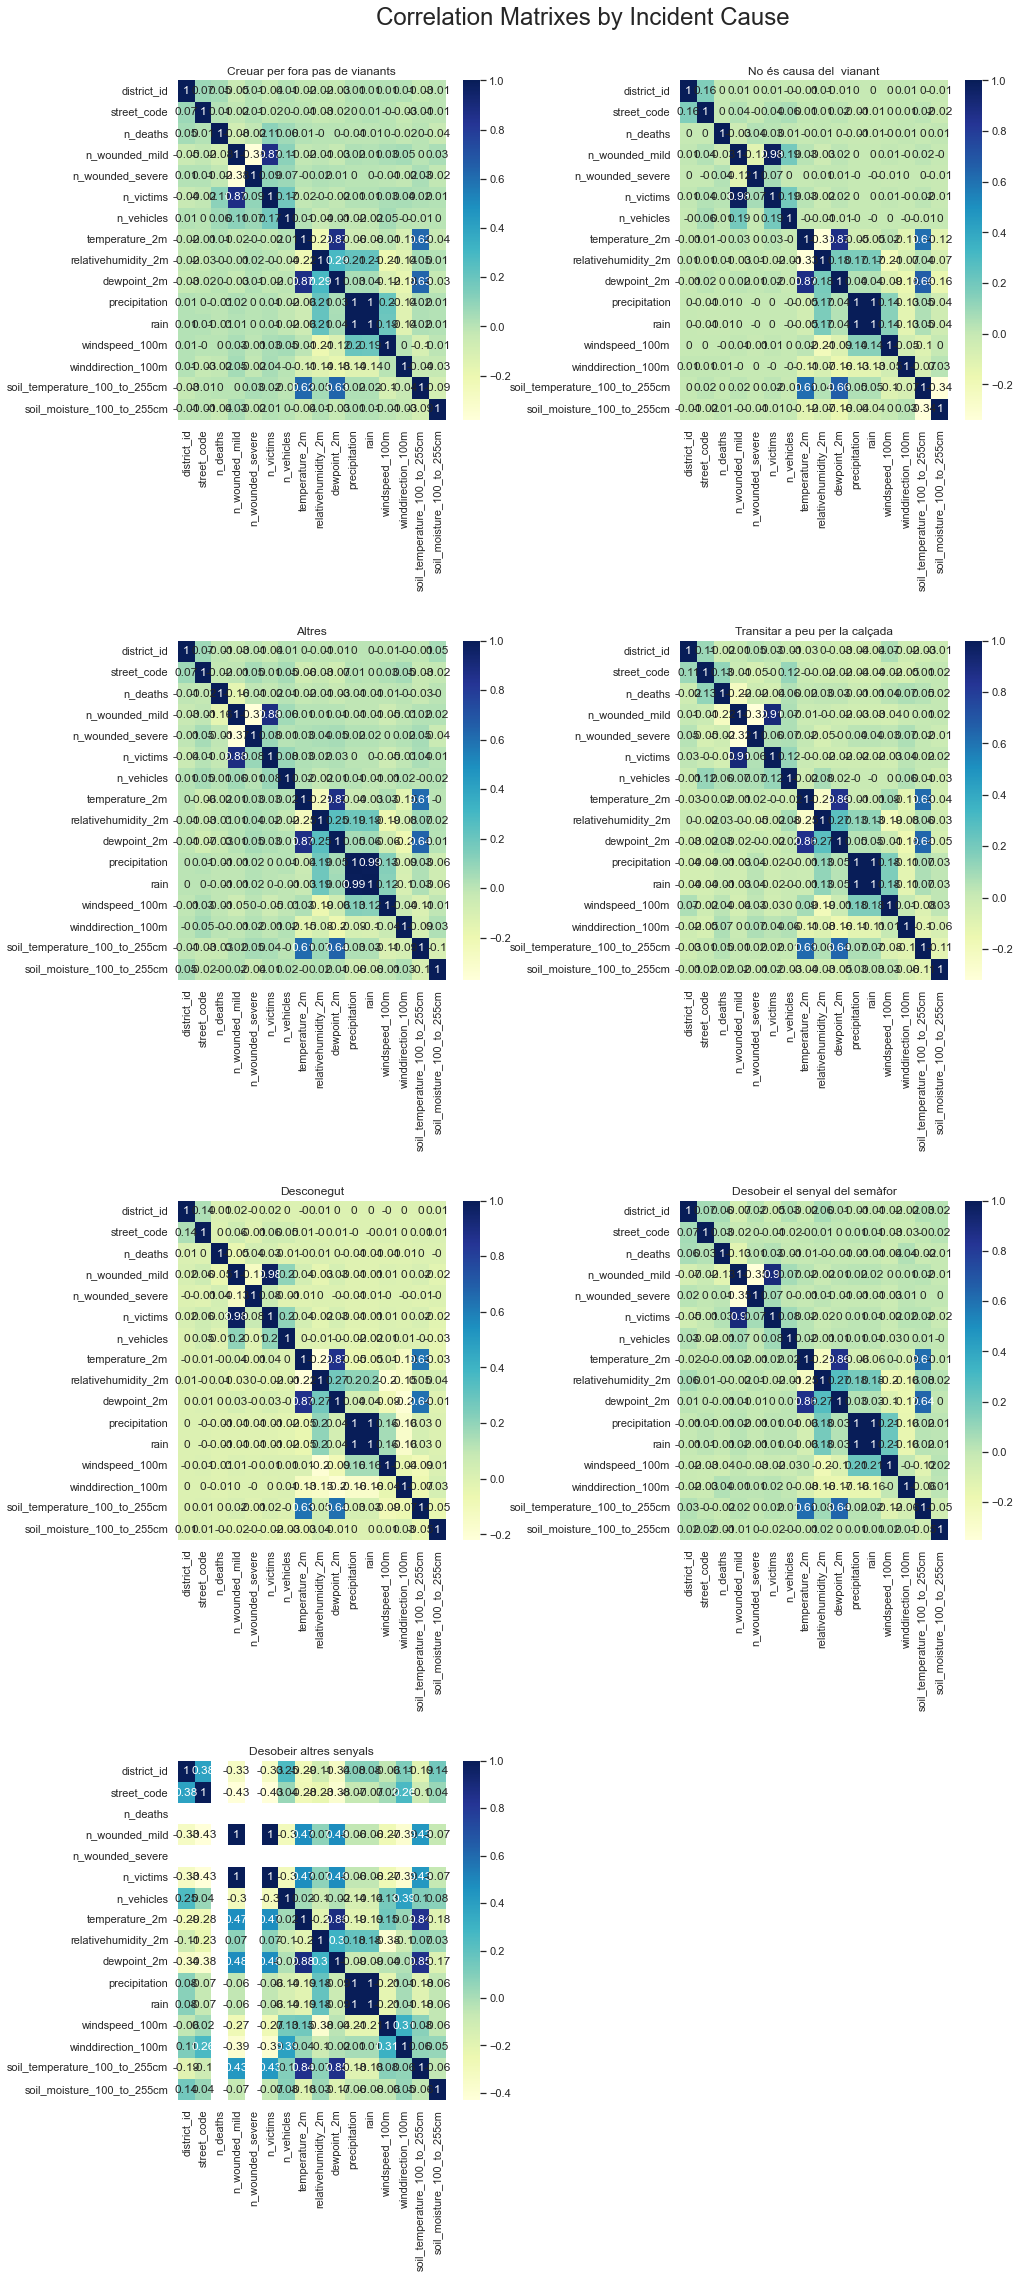

In [45]:
# We first make a list with all causes of incidents listed in our data set:
causes = list(set(full_data["cause_incident"]))

# Set the number of rows and columns for the subplot grid
n_rows = int(np.ceil(len(causes) / 2))
n_cols = 2

# Set up the subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,34))

# Adjust the space between subplots
fig.subplots_adjust(wspace=0.5, hspace=0.65, top=0.95)

# Add a title to the entire figure
fig.suptitle("Correlation Matrixes by Incident Cause", fontsize=24)

# Flatten the subplot array to a 1D array
axs = axs.flatten()

# Loop over each cause and plot the heat map
for i, cause in enumerate(causes):
    corr_matrix = full_data[full_data["cause_incident"] == cause].corr().round(2)
    sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, ax=axs[i], annot_kws={'size':12})
    axs[i].set_title(cause)

# Remove the unused subplot axes
for i in range(len(causes), len(axs)):
    fig.delaxes(axs[i])

plt.savefig('images/correlation3.jpg', format='jpg', transparent=False, bbox_inches='tight')
plt.show()


Weather data and accident data do not seem to be very correalted. We could see a few higher correlation values when we took a deeper look at the incident types but nothing too relevant.

## Exporting enriched data sets
Lets export these data sets for visualilzing regardless of the low correlations.

In [46]:
full_data.to_csv('data/results/detailed.csv')
grouped_data.to_csv('data/results/grouped.csv')